# ORIE 4580/5580/5581 Assignment 3

#### Students: Kahei Lam(kl2235) and J. von Neuman (jvn001)

### Github link: https://github.com/Althealam/ORIE-5580-Simulation-Modeling-Analysis/blob/main/HW3/ORIE_5580_hw3.ipynb

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.
    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.
    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m

        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)

        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

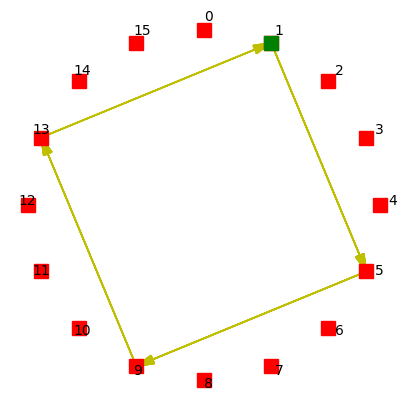

In [ ]:
# Ans
n = 20 # number of samples

## 1. X(n+1) = (5*X(n)) mod 16
m1 = 16
a1 = 5
c1 = 0
seed1 = 1
fig = plt.figure(figsize = (5, 5))
x_seq = LCG(n=n, m=m1, a=a1, c=c1, seed=seed1)

plot_clock_face(m1, fig, annotate=True)
plot_clock_path(m1, x_seq, fig)
plt.axis('off')
plt.show()


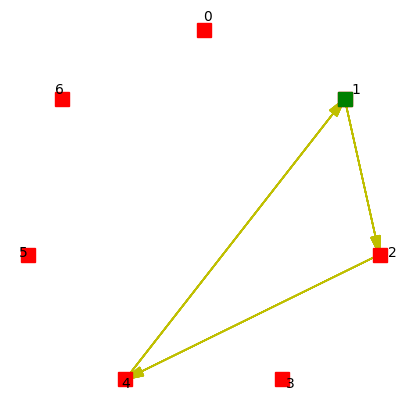

In [ ]:
# Ans
## 2. Y(n+1) = (2*Y(n)) mod 7
m2 = 7
a2 = 2
c2 = 0
seed2 = 1
fig = plt.figure(figsize = (5, 5))
y_seq = LCG(n=n, m=m2, a=a2, c=c2, seed=seed2)

plot_clock_face(m2, fig, annotate=True)
plot_clock_path(m2, y_seq, fig)
plt.axis('off')
plt.show()


<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

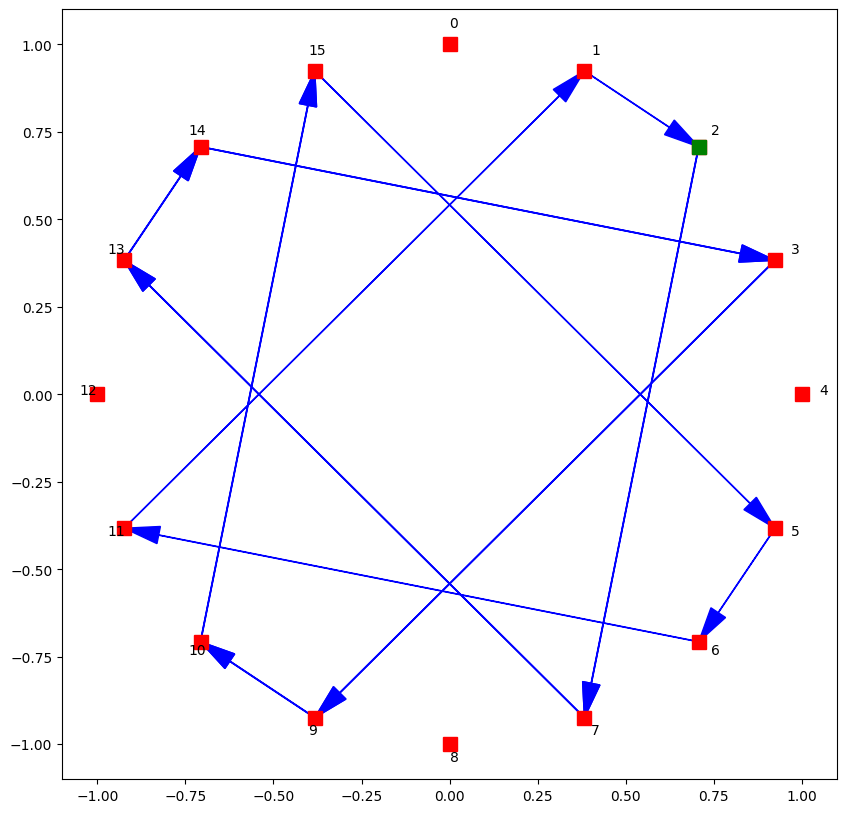

In [ ]:
x_prime = np.round(x_seq*(m1+1)-1).astype(int)
y_prime = np.round(y_seq*(m2+1)-1).astype(int)

z_prime = (x_prime+y_prime) % 16
z_seq = (z_prime+1.0)/(16+1.0)

fig = plt.figure(figsize=(10, 10))
plot_clock_face(m=16, fig=fig, annotate= True)
plot_clock_path(m=16, x=z_seq, fig=fig, color='b')


___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


**1. The period of $x_n$**<br>
$$x_0=1$$
$$x_1=(5\times1) mod 16=5$$
$$x_2=(5\times5) mod 16=9$$
$$x_3=13$$
$$x_4=1$$
We can know that $x_4$=$x_0$=1, so the sequence start repeating and the period of $x_n$ is 4

**2. The period of $y_n$**<br>
$$y_0=1$$
$$y_1=(2\times1) mod 7=2$$
$$y_2=4$$
$$y_3=1$$
The period of $y_n$ is 3

**3. The period of $z_n$**<br>
We know that the period of $x_n$ is 4 and the period of $y_n$ is 3. So the period of $z_n$ is $lcm(4,3)=12$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


**Case 1: $ y \in t(0, \frac{1}{2}] $**

We need the smallest $ x $ with $ F(x) \geq y $.

- For $ x < 0 $: $ F(x) = 0 $. Since $ y \geq 0 $, $ 0 \geq y $ only holds when $ y = 0 $; for $ y \in (0, \frac{1}{2}) $, $ 0 < y $, so $ x < 0 $ fails.
- For $ 0 \leq x < \frac{1}{2} $: $ F(x) = x $. Solve $ x \geq y $. The smallest $ x $ is $ y $ (as $ F(x) $ increases here, and $ y < \frac{1}{2} $ keeps $ x = y $ in $[0, \frac{1}{2})$).

Thus, $ F^{-1}(y) = y $ for $ y \in [0, \frac{1}{2}) $.

---

**Case 2: $ y = \frac{1}{2} $**

We need the smallest $ x $ with $ F(x) \geq \frac{1}{2} $.

- For $ x < \frac{1}{2} $: $ F(x) < \frac{1}{2} $, so no solution.
- For $ x \geq \frac{1}{2} $: $ F(x) \geq \frac{1}{2} $ (since $ F(x) = \frac{1}{2} $ when $ \frac{1}{2} \leq x < 1 $, and $ F(x) = 1 $ when $ x \geq 1 $). The smallest $ x $ is $ \frac{1}{2} $.

Thus, $ F^{-1}(\frac{1}{2}) = \frac{1}{2} $.

---

**Case 3: $ y \in \left( \frac{1}{2}, 1 \right] $**

We need the smallest $ x $ with $ F(x) \geq y $.

- For $ x < 1 $: $ F(x) \leq \frac{1}{2} < y $, so no solution.
- For $ x \geq 1 $: $ F(x) = 1 \geq y $ (since $ y \leq 1 $). The smallest $ x $ is 1.

Thus, $ F^{-1}(y) = 1 $ for $ y \in \left( \frac{1}{2}, 1 \right] $.

---

**Final Pseudoinverse**

$$
F^{-1}(y) =
\begin{cases}
y & \text{if } y \in [0, \frac{1}{2}), \\
\frac{1}{2} & \text{if } y = \frac{1}{2}, \\
1 & \text{if } y \in \left( \frac{1}{2}, 1 \right].
\end{cases}
$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

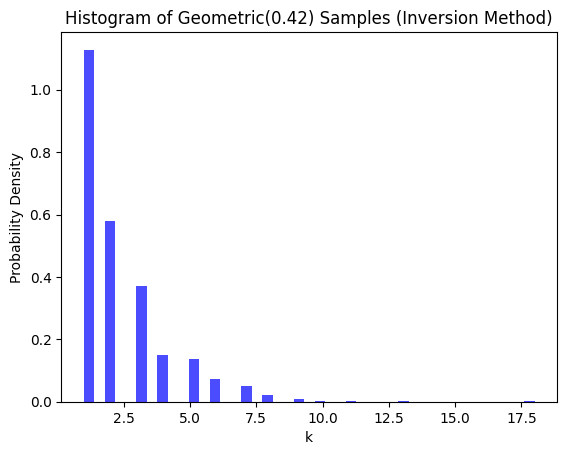

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# implement the inversion algorithm
def geometric_inversion(n, p):
    """
    Generate n samples from Geometric(p) using the inversion method.
    """
    # Generate uniform random variables
    u = np.random.uniform(0, 1, n)
    # Apply the inverse CDF
    samples = np.ceil(np.log(1 - u) / np.log(1 - p)).astype(int)
    return samples

# Parameters
n = 1000  # Number of samples
p = 0.42  # Success probability

# Generate samples
samples = geometric_inversion(n, p)

# Plot histogram
plt.hist(samples, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Histogram of Geometric(0.42) Samples (Inversion Method)')
plt.xlabel('k')
plt.ylabel('Probability Density')
plt.show()

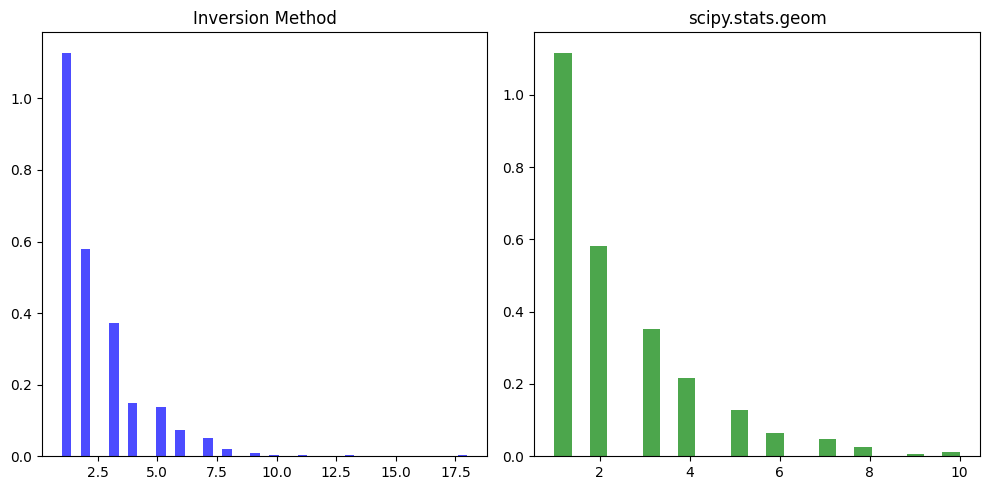

In [ ]:
# verification with scipy.stats
from scipy.stats import geom

# Generate samples using scipy
scipy_samples = geom.rvs(p, size=n)

# Plot both histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(samples, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Inversion Method')

plt.subplot(1, 2, 2)
plt.hist(scipy_samples, bins='auto', density=True, alpha=0.7, color='green')
plt.title('scipy.stats.geom')

plt.tight_layout()
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

**1. Piecewise Probability Density Function (PDF)**
$$
f(x) =
\begin{cases}
e^{x-2} & \text{if } 0 \leq x \leq 2, \\
e^{-x} & \text{if } x > 2, \\
0 & \text{otherwise}.
\end{cases}
$$

**2. Derivation of Cumulative Distribution Function (CDF)**
$$
F(x) = \int_{-\infty}^{x} f(t)  dt
$$

- For $ x < 0 $:
$$
F(x) = 0
$$

- For $ 0 \leq x \leq 2 $:
$$
F(x) = \int_{0}^{x} e^{t-2}  dt = \left[ e^{t-2} \right]_{0}^{x} = e^{x-2} - e^{-2}
$$

- For $ x > 2 $:
$$
F(x) = \int_{0}^{2} e^{t-2}  dt + \int_{2}^{x} e^{-t}  dt
$$
$$
= \left(1 - e^{-2}\right) + \left(e^{-2} - e^{-x}\right) = 1 - e^{-x}
$$

**3. Derivation of Inverse CDF ($ F^{-1}(u) $)**
$$
F^{-1}(u) = \text{the value of } x \text{ satisfying } F(x) = u
$$

- For $ 0 \leq u \leq 1 - e^{-2} $:
$$
e^{x-2} - e^{-2} = u \implies x = \ln\left(u + e^{-2}\right) + 2
$$

- For $ u > 1 - e^{-2} $:
$$
1 - e^{-x} = u \implies x = -\ln(1 - u)
$$

**4. Final Inverse Transformation Formula**
$$
F^{-1}(u) =
\begin{cases}
\ln\left(u + e^{-2}\right) + 2 & \text{if } 0 \leq u \leq 1 - e^{-2}, \\
-\ln(1 - u) & \text{if } u > 1 - e^{-2}.
\end{cases}
$$

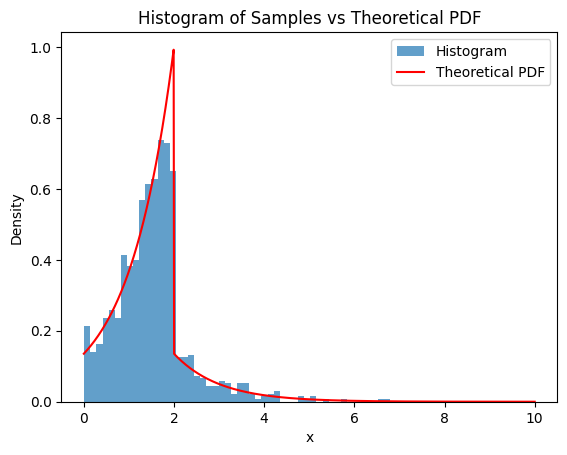

In [ ]:
# implement the inversion algorithm

import numpy as np
import matplotlib.pyplot as plt

def inverse_transform_sampling(n):
    """Generate n samples from the given PDF using inversion."""
    u = np.random.uniform(0, 1, n)
    x = np.zeros(n)

    # Case 1: 0 <= u <= 1 - exp(-2)
    mask = u <= (1 - np.exp(-2))
    x[mask] = np.log(u[mask] + np.exp(-2)) + 2

    # Case 2: u > 1 - exp(-2)
    x[~mask] = -np.log(1 - u[~mask])

    return x

# Generate 1000 samples
n = 1000
samples = inverse_transform_sampling(n)

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Histogram')

# Plot the theoretical PDF
x_vals = np.linspace(0, 10, 1000)
pdf = np.zeros_like(x_vals)
# PDF for 0 <= x <= 2
mask_pdf1 = (x_vals >= 0) & (x_vals <= 2)
pdf[mask_pdf1] = np.exp(x_vals[mask_pdf1] - 2)
# PDF for x > 2
mask_pdf2 = x_vals > 2
pdf[mask_pdf2] = np.exp(-x_vals[mask_pdf2])
plt.plot(x_vals, pdf, 'r-', label='Theoretical PDF')

plt.title('Histogram of Samples vs Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


In [1]:
import numpy as np


def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4

c = 13/4 # c is maximum when plug in x=1 in to f(x)

def sample_X(n_samples=1):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= f(x)/c:
            samples.append(x)
    return np.array(samples)

samples = sample_X(1000)
samples

array([0.93034468, 0.93804381, 0.95432786, 0.67174348, 0.84747004,
       0.98148818, 0.77095777, 0.86520859, 0.69342324, 0.84604829,
       0.04316345, 0.75265934, 0.42628348, 0.28410728, 0.97476949,
       0.34387113, 0.76935239, 0.65647153, 0.94103698, 0.7717421 ,
       0.55263106, 0.61991537, 0.91550548, 0.87544287, 0.87692616,
       0.89806509, 0.61525441, 0.10041846, 0.97366584, 0.32386921,
       0.75456393, 0.18238689, 0.800179  , 0.98904061, 0.97967015,
       0.95662684, 0.93539742, 0.95602143, 0.94109531, 0.86011476,
       0.9408876 , 0.8651341 , 0.37337688, 0.95524927, 0.5381595 ,
       0.49505358, 0.98442766, 0.79344766, 0.18915559, 0.98046928,
       0.96055   , 0.37226172, 0.57568022, 0.52672544, 0.96277072,
       0.87921633, 0.2974513 , 0.27704008, 0.8292173 , 0.78019728,
       0.58214926, 0.96585545, 0.30541679, 0.73183723, 0.69037155,
       0.08909471, 0.70542355, 0.68763184, 0.45486204, 0.59002195,
       0.88482049, 0.45468343, 0.34530234, 0.83252325, 0.67235

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

$$
p_{\text{accept}} = \frac{1}{c},
$$

$$
\mathbb{E}[N] = \frac{1}{p_{\text{accept}}} = c.
$$

For the given density function

$$
f(x) = \frac{5x^4 + 4x^3 + 3x^2 + 1}{4}, \quad 0 \leq x \leq 1,
$$

the maximum occurs at $x=1$:

$$
f(1) = \frac{13}{4} = 3.25.
$$

Therefore,

$$
p_{\text{accept}} = \frac{1}{3.25}
$$

$$
\mathbb{E}[N] = 3.25
$$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

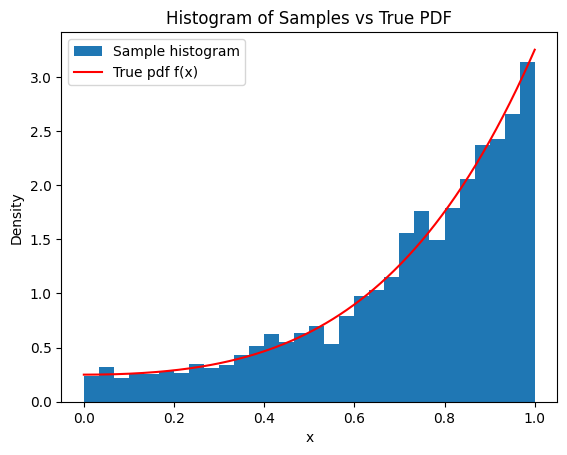

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(111)
samples = sample_X(2500)

x_vals = np.linspace(0,1,200)
pdf_vals = f(x_vals)

plt.hist(samples, bins=30, density=True, label="Sample histogram")
plt.plot(x_vals, pdf_vals, 'r-', label="True pdf f(x)")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Samples vs True PDF")
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

The CDF is

$$
G(x) = \int_{-\infty}^x g(t), dt.
$$

For $x<0$:
$|x|=-x$, so
$$
g(x) = \tfrac{1}{2} e^{x}, \quad x<0.
$$
Hence
$$
G(x) = \tfrac{1}{2} e^{x}.
$$

For $x\geq 0$:
$|x|=x$, so
$$
g(x) = \tfrac{1}{2} e^{-x}.
$$
The CDF is the sum of the probability mass on $(-\infty,0]$ and the integral from $0$ to $x$:
$$
G(x) = \tfrac{1}{2} + \Big( \tfrac{1}{2} - \tfrac{1}{2} e^{-x} \Big) = 1 - \tfrac{1}{2} e^{-x}.
$$

Let $U \sim \text{Uniform}(0,1)$. Set $G(x)=U$ and solve for $x$:

If $0<U<0.5$:

$$
U = \tfrac{1}{2} e^{x} \quad \Rightarrow \quad x = \ln(2U).
$$

If $0.5 \leq U < 1$:

$$
U = 1 - \tfrac{1}{2} e^{-x} \quad \Rightarrow \quad x = -\ln(2(1-U)).
$$

In [3]:
def sample_laplace(n_samples=1):
    U = np.random.rand(n_samples)
    X = np.where(U < 0.5,
                 np.log(2*U),
                 -np.log(2*(1-U)))
    return X

samples = sample_laplace(10)
samples

array([ 1.74284943, -1.8709212 ,  0.01563474,  1.3820094 ,  4.03449315,
        3.31980923, -0.99662524, -0.11495978,  0.06469833,  0.05960708])

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

In [4]:
def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)

def g(x):
    return 0.5 * np.exp(-np.abs(x))

def ratio(x):
    return f(x) / g(x)

# function to find minimal k which is also the max of f/g
def find_k(xmin=-10, xmax=10, num_points=200000):
    x_vals = np.linspace(xmin, xmax, num_points)
    ratios = ratio(x_vals)
    return np.max(ratios)

k = find_k()

def sample_laplace(n_samples=1):
    U = np.random.rand(n_samples)
    return np.where(U < 0.5, np.log(2*U), -np.log(2*(1-U)))

def sample_normal(n_samples=1):
    samples = []
    while len(samples) < n_samples:
        y = sample_laplace(1)[0]
        u = np.random.rand()
        if u <= f(y)/(k*g(y)):
            samples.append(y)
    return np.array(samples)


print('Smallest k:',k)
print("Expected uniform draws per accepted sample ≈", k)

Smallest k: 1.3154892456269678
Expected uniform draws per accepted sample ≈ 1.3154892456269678


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

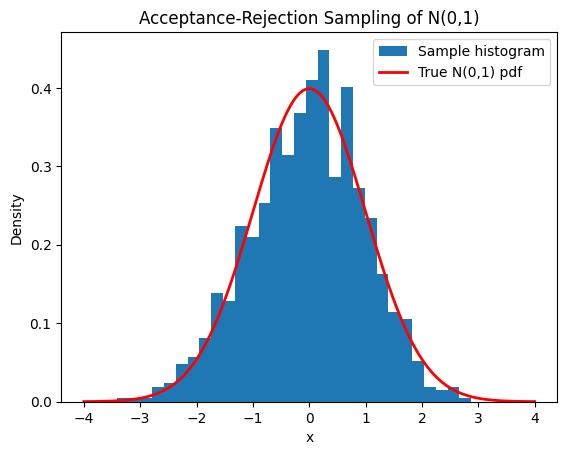

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(111)
samples = sample_normal(1000)

x_vals = np.linspace(-4, 4, 300)
pdf_vals = f(x_vals)

plt.hist(samples, bins=30, density=True, label="Sample histogram")
plt.plot(x_vals, pdf_vals, 'r-', linewidth=2, label="True N(0,1) pdf")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Acceptance-Rejection Sampling of N(0,1)")
plt.legend()
plt.show()




In [6]:
def sample_normal_ar(n_samples=1):
    samples = []
    U_count = 0
    while len(samples) < n_samples:
        y = sample_laplace(1)[0]
        U_count += 1
        u = np.random.rand()
        U_count += 1

        if u <= f(y)/(k*g(y)):
            samples.append(y)
    return np.array(samples), U_count

np.random.seed(111)
samples, U_used = sample_normal_ar(1000)

avg_U_per_sample = U_used / 1000

trials = []
for _ in range(200):
    _, U_count = sample_normal_ar(200)
    trials.append(U_count/200)
mean_val = np.mean(trials)
se_val = np.std(trials, ddof=1)/np.sqrt(len(trials))
ci_low, ci_high = st.norm.interval(0.95, loc=mean_val, scale=se_val)

print('Average uniforms per accepted sample: ',avg_U_per_sample)
print("95% CI ≈", ci_low, ci_high)

Average uniforms per accepted sample:  2.68
95% CI ≈ 2.625716449069319 2.649783550930682


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

The standard Cauchy has pdf

$$
g(x) = \frac{1}{\pi(1+x^2)}, \quad x \in \mathbb{R}.
$$

$$
G(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2}.
$$

$$
G^{-1}(u) = \tan\!\big(\pi(u - 0.5)\big).
$$

To generate a Cauchy random variable:

Generate $U \sim \text{Uniform}(0,1)$

Set $X = \tan\!\left(\pi(U - 0.5)\right)$

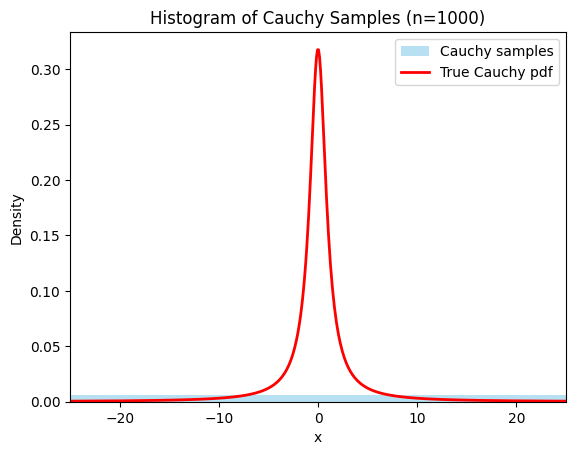

In [7]:
def sample_cauchy(n_samples=1):
    U = np.random.rand(n_samples)
    X = np.tan(np.pi * (U - 0.5))
    return X

np.random.seed(111)
samples_cauchy = sample_cauchy(1000)

plt.hist(samples_cauchy, bins=50, density=True, alpha=0.6, color='skyblue', label="Cauchy samples")

x_vals = np.linspace(-25, 25, 500)
pdf_vals = 1/(np.pi*(1+x_vals**2))
plt.plot(x_vals, pdf_vals, 'r-', linewidth=2, label="True Cauchy pdf")

plt.xlim(-25,25)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Cauchy Samples (n=1000)")
plt.legend()
plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

In [8]:
import numpy as np

def compute_k_and_expected_uniforms(f, g, search_range=(-10, 10), num_points=200000):
    x_vals = np.linspace(search_range[0], search_range[1], num_points)
    ratios = f(x_vals) / g(x_vals)
    k_min = np.max(ratios)

    expected_uniforms = 2 * k_min

    return k_min, expected_uniforms

def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)

def g(x):
    return 1/(np.pi*(1+x**2))

k_val, exp_uniforms = compute_k_and_expected_uniforms(f, g)
print("Least k =", k_val)
print("Expected uniforms per sample =", exp_uniforms)

Least k = 1.5203468995269371
Expected uniforms per sample = 3.0406937990538743
